In [1]:
# import pkg including web scraping
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lxml as xml
import urllib.request
from bs4 import BeautifulSoup

In [2]:
#url source of cost of living data
url = 'https://www.numbeo.com/cost-of-living/rankings_current.jsp'

In [3]:
#scrape data from url source
read = pd.read_html(url)
df = read[2]
split = df[['City', '1']] = df['City'].str.split(',',1, expand=True)
raw_input = pd.concat([df, split], axis=1)
df2 = raw_input[['City', 'Cost of Living Index', 'Rent Index', 'Groceries Index', 'Restaurant Price Index', \
                 'Local Purchasing Power Index']]
df2.head()

,City,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Basel,128.92,45.71,128.13,126.28,130.59
1,Zurich,124.77,57.71,126.70,123.81,140.70
2,Lausanne,120.61,48.19,122.76,118.13,127.76
3,Lugano,120.24,45.58,123.03,118.21,123.46
4,Geneva,119.97,66.77,117.94,118.55,122.13


In [4]:
list20 = ['Atlanta', 'Austin', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Los Angeles', \
           'Miami', 'Montgomery County', 'Nashville', 'Newark', 'New York', 'Northern Virginia', 'Philadelphia', \
           'Pittsburgh', 'Raleigh', 'Toronto', 'Washington']
len(list20)

20

In [5]:
#filter data frame for Amazon top 20 list of cities to build HQ2
city20 = df2['City'].isin(list20)
df20 = df2[city20]
sortdf = df20.sort_values('Cost of Living Index')
sortdf = sortdf.set_index('City', drop=True)
sortdf

,Cost of Living Index,Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
City,,,,,
Dallas,66.56,43.86,61.91,68.02,175.23
Indianapolis,67.61,31.42,63.96,68.60,115.40
Columbus,67.92,34.97,63.42,64.38,133.86
Nashville,68.02,47.49,62.36,78.03,143.74
Austin,70.42,48.40,67.43,76.78,146.77
Raleigh,71.03,35.81,76.37,65.81,175.39
Denver,71.24,52.77,66.82,75.91,123.83
Atlanta,74.05,46.07,69.73,72.28,136.65
Pittsburgh,74.15,36.77,67.34,73.70,117.49


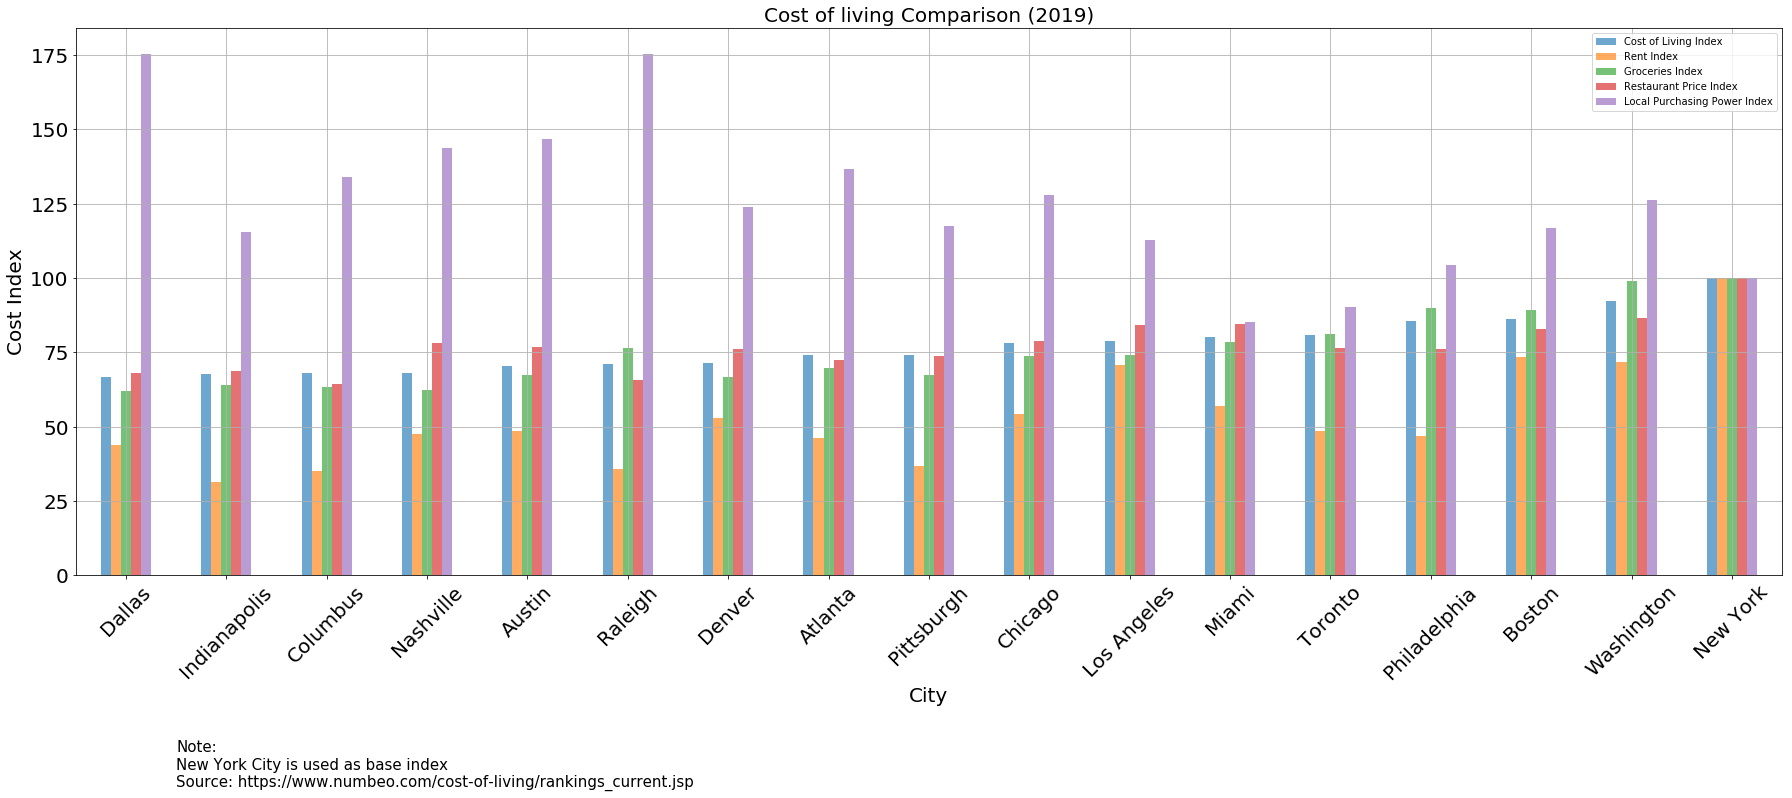

In [6]:
#plot data to bar chart
sortdf.plot.bar(figsize=(25, 10), grid=True, fontsize=20, rot=45, alpha=0.65)
plt.title('Cost of living Comparison (2019)', fontsize=20)
plt.xlabel('City', fontsize=20)
plt.ylabel('Cost Index', fontsize=20)
plt.text(.1, -.1, 'Note:\nNew York City is used as base index\nSource: https://www.numbeo.com/cost-of-living/rankings_current.jsp', fontsize=15, transform=plt.gcf().transFigure)
plt.savefig('Cost_of_Living_Chart.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [10]:
# save data in csv and chart
sortdf.to_csv('Amazon_top20.csv')

In [ ]:
#complete`